## Data Processing Exercise
---
Dhruv Meena

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
COVID_DATA = pd.read_csv('/content/Covid_Data_new.csv')

In [3]:
display(COVID_DATA)

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No
...,...,...,...,...,...,...
65,86.0,High,no,yes,76.0,Yes
66,61.0,Moderate,no,yes,90.0,No
67,94.0,High,yes,yes,64.0,Yes
68,81.0,High,yes,yes,75.0,Yes


In [4]:
features = COVID_DATA.iloc[:, :-1].values # get all rows from first to last, using all columns except the last one
labels = COVID_DATA.iloc[:, -1].values # get all rows from first to last, using only the last column

In [5]:
display(features)

array([[10.0, 'Normal', 'no', 'no', 97.0],
       [12.0, 'Normal', 'no', 'no', 97.0],
       [15.0, 'Normal', 'no', 'no', 94.0],
       [10.0, 'Normal', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 94.0],
       [12.0, 'Moderate', 'no', 'no', 97.0],
       [13.0, 'Moderate', 'no', 'no', 93.0],
       [15.0, 'Moderate', 'no', 'no', 92.0],
       [18.0, 'Moderate', 'no', 'no', 66.0],
       [19.0, 'Normal', 'no', 'no', 92.0],
       [20.0, 'Normal', 'no', 'no', 93.0],
       [17.0, 'Normal', 'no', 'no', 93.0],
       [16.0, 'Normal', 'no', 'no', 92.0],
       [18.0, 'Normal', 'no', 'no', 93.0],
       [20.0, 'Normal', 'no', 'no', 92.0],
       [25.0, 'Moderate', 'no', 'no', 93.0],
       [24.0, 'Moderate', 'no', 'no', 92.0],
       [26.0, 'High', 'no', 'no', 94.0],
       [28.0, 'Normal', 'no', 'no', 99.0],
       [29.0, 'Normal', 'no', 'no', 93.0],
       [30.0, 'Moderate', 'no', 'no', 62.0],
       [19.0, 'Normal', 'no', 'no', 89.0],
       [25.0, 'Normal', 'no', 'yes', 86.

In [6]:
display(labels)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
      dtype=object)

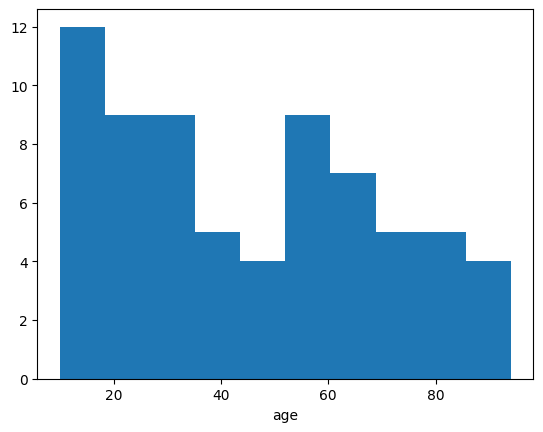

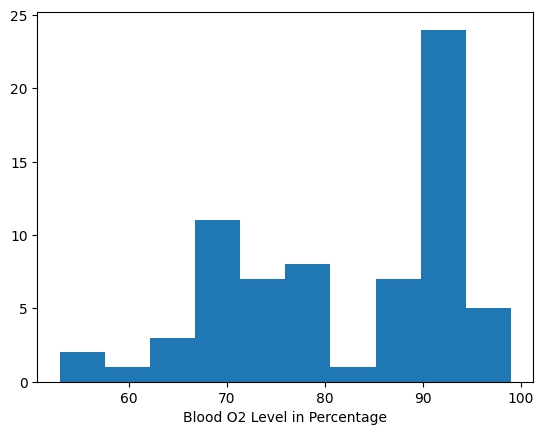

In [7]:
for col in COVID_DATA.columns.values:
  if (COVID_DATA[col].dtypes == 'int64' or COVID_DATA[col].dtypes == 'float64'):
    # what we are doing is defining the number of bins for the variables. If the unique values are more than 20 than we take 10 bins of the data otherwise we plot it as it is
    plt.hist(COVID_DATA[col],10 if len(pd.unique(COVID_DATA[col]))>20 else len(pd.unique(COVID_DATA[col])))
    plt.xlabel(col)
    plt.show()

# Handling missing data

In [8]:
for col in COVID_DATA.columns.values: # For each column in COVID DATA
  list_vals = pd.unique(COVID_DATA[col])    # Create a list of unique values
  print(col + ' is of type ' + str(COVID_DATA[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(COVID_DATA[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

age is of type float64, has 51 unique values, and 1 null entries
body_temperature is of type object, has 3 unique values, and 0 null entries
  These are: Normal, Moderate, High
chronic_disease is of type object, has 2 unique values, and 0 null entries
  These are: no, yes
breathing_issue is of type object, has 2 unique values, and 0 null entries
  These are: no, yes
Blood O2 Level in Percentage is of type float64, has 28 unique values, and 1 null entries
Needed Hospitalization is of type object, has 2 unique values, and 0 null entries
  These are: No, Yes


### Observations:
---
- Categorical Data: `body_temperature`, `chronic_disease` and `breathing_issue`
- There is one null entry in `age` and in `Blood O2 Level`

In [9]:
COVID_DATA.dropna(inplace = True) # drop all rows with null entries

In [10]:
for col in COVID_DATA.columns.values: # For each column in COVID DATA
  list_vals = pd.unique(COVID_DATA[col])    # Create a list of unique values
  print(col + ' is of type ' + str(COVID_DATA[col].dtypes) + ', has ' + str(len(list_vals)) + ' unique values, and ' + str(np.sum(pd.isnull(COVID_DATA[col]))) + ' null entries')
  if len(list_vals) < 10: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

age is of type float64, has 50 unique values, and 0 null entries
body_temperature is of type object, has 3 unique values, and 0 null entries
  These are: Normal, Moderate, High
chronic_disease is of type object, has 2 unique values, and 0 null entries
  These are: no, yes
breathing_issue is of type object, has 2 unique values, and 0 null entries
  These are: no, yes
Blood O2 Level in Percentage is of type float64, has 27 unique values, and 0 null entries
Needed Hospitalization is of type object, has 2 unique values, and 0 null entries
  These are: No, Yes


No more null entries!

# Encoding categorical data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1])], remainder= 'passthrough')
features = np.array(ct.fit_transform(features))
print(features)

[[0.0 0.0 1.0 10.0 'no' 'no' 97.0]
 [0.0 0.0 1.0 12.0 'no' 'no' 97.0]
 [0.0 0.0 1.0 15.0 'no' 'no' 94.0]
 [0.0 0.0 1.0 10.0 'no' 'no' 97.0]
 [0.0 1.0 0.0 13.0 'no' 'no' 94.0]
 [0.0 1.0 0.0 12.0 'no' 'no' 97.0]
 [0.0 1.0 0.0 13.0 'no' 'no' 93.0]
 [0.0 1.0 0.0 15.0 'no' 'no' 92.0]
 [0.0 1.0 0.0 18.0 'no' 'no' 66.0]
 [0.0 0.0 1.0 19.0 'no' 'no' 92.0]
 [0.0 0.0 1.0 20.0 'no' 'no' 93.0]
 [0.0 0.0 1.0 17.0 'no' 'no' 93.0]
 [0.0 0.0 1.0 16.0 'no' 'no' 92.0]
 [0.0 0.0 1.0 18.0 'no' 'no' 93.0]
 [0.0 0.0 1.0 20.0 'no' 'no' 92.0]
 [0.0 1.0 0.0 25.0 'no' 'no' 93.0]
 [0.0 1.0 0.0 24.0 'no' 'no' 92.0]
 [1.0 0.0 0.0 26.0 'no' 'no' 94.0]
 [0.0 0.0 1.0 28.0 'no' 'no' 99.0]
 [0.0 0.0 1.0 29.0 'no' 'no' 93.0]
 [0.0 1.0 0.0 30.0 'no' 'no' 62.0]
 [0.0 0.0 1.0 19.0 'no' 'no' 89.0]
 [0.0 0.0 1.0 25.0 'no' 'yes' 86.0]
 [0.0 0.0 1.0 26.0 'no' 'no' nan]
 [0.0 0.0 1.0 28.0 'no' 'no' 89.0]
 [0.0 1.0 0.0 30.0 'yes' 'no' 86.0]
 [0.0 1.0 0.0 35.0 'no' 'no' 89.0]
 [0.0 1.0 0.0 32.0 'no' 'yes' 84.0]
 [0.0 1.0 0.0 nan 

### Encoding Dependent Variables

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1]


### Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 22) # doing a 75-25 split
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (52, 7), X_test: (18, 7), y_train: (52,), y_test: (18,)


### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 6:] = sc.fit_transform(X_train[:, 6:])
X_test[:, 6:] = sc.fit_transform(X_test[:, 6:])
print(X_train)

[[0.0 0.0 1.0 10.0 'no' 'no' 1.2092765967000088]
 [1.0 0.0 0.0 54.0 'yes' 'yes' -1.116385238014951]
 [1.0 0.0 0.0 69.0 'no' 'yes' -2.580690837650296]
 [0.0 0.0 1.0 19.0 'no' 'no' 0.7785984791602014]
 [1.0 0.0 0.0 82.0 'yes' 'yes' -0.8579783674910666]
 [0.0 0.0 1.0 16.0 'no' 'no' 0.7785984791602014]
 [0.0 0.0 1.0 19.0 'no' 'no' 0.520191608636317]
 [0.0 1.0 0.0 40.0 'no' 'yes' 0.6063272321442784]
 [0.0 1.0 0.0 24.0 'no' 'no' 0.7785984791602014]
 [0.0 1.0 0.0 30.0 'yes' 'no' 0.2617847381124325]
 [0.0 1.0 0.0 35.0 'no' 'no' 0.520191608636317]
 [1.0 0.0 0.0 59.0 'no' 'yes' -1.2025208615229126]
 [0.0 1.0 0.0 49.0 'no' 'no' -0.2550290029353363]
 [0.0 1.0 0.0 25.0 'no' 'no' 0.8647341026681629]
 [0.0 0.0 1.0 12.0 'no' 'no' 1.2092765967000088]
 [1.0 0.0 0.0 40.0 'no' 'no' 0.7785984791602014]
 [0.0 0.0 1.0 18.0 'no' 'no' 0.8647341026681629]
 [0.0 1.0 0.0 35.0 'no' 'yes' 0.7785984791602014]
 [0.0 0.0 1.0 17.0 'no' 'no' 0.8647341026681629]
 [1.0 0.0 0.0 86.0 'yes' 'yes' -1.0302496145069895]
 [0.0 0